In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
interactions = pd.read_csv("interactions.csv")

In [3]:
user_item_counts = interactions.groupby("user")["item"].nunique()

# subset

In [23]:
# Group the data by the "user" column and count the number of interactions for each user
user_interactions = interactions.groupby("user").size().reset_index(name="num_interactions")

# Filter the DataFrame to keep only the users with at least 10 interactions
filtered_df = interactions[interactions["user"].isin(user_interactions[user_interactions["num_interactions"] >= 10]["user"])]

# Group the data by the "user" column and count the number of interactions for each user
item_interactions = interactions.groupby("user").size().reset_index(name="num_interactions")

# Filter the DataFrame to keep only the users with at least 10 interactions
filtered_df = interactions[interactions["user"].isin(user_interactions[user_interactions["num_interactions"] >= 10]["user"])]

# Save the filtered dataset or use it for further analysis
# filtered_df.to_csv("filtered_dataset.csv", index=False)

filtered_df

,user,item,event,timestamp
0,27901,56865,click,1581465600
1,124480,115662,click,1581465600
2,159509,5150,click,1581465600
3,188861,109981,click,1581465600
5,237794,153318,click,1581465600
...,...,...,...,...
65502196,2876233,90074,click,1582675199
65502197,3011254,90671,click,1582675199
65502198,3011612,62471,click,1582675199
65502199,3045719,27937,click,1582675199


In [24]:
filtered_df.shape

(58687102, 4)

In [25]:
interactions.head()

,user,item,event,timestamp
0,27901,56865,click,1581465600
1,124480,115662,click,1581465600
2,159509,5150,click,1581465600
3,188861,109981,click,1581465600
4,207348,88746,click,1581465600


In [26]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65502201 entries, 0 to 65502200
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user       int64 
 1   item       int64 
 2   event      object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ GB


# Basic statistics of the dataset 

In [27]:
n_users = interactions["user"].nunique()
n_items = interactions["item"].nunique()
n_interactions = interactions.shape[0]

interactions_per_user = interactions.groupby("user").size()
interactions_per_item = interactions.groupby("item").size()

print(f"We have {n_users} users, {n_items} items and {n_interactions} interactions.")
print(f"Data sparsity (% of missing entries) is {100 * (1- n_interactions / (n_users * n_items)):.2f}%.")
print(f"Average number of interactions per user is {interactions_per_user.mean():.2f} (standard deviation {interactions_per_user.std(ddof=0):.2f}).")
print(f"Average number of interactions per item is {interactions_per_item.mean():.2f} (standard deviation {interactions_per_item.std(ddof=0):.2f}).")

We have 3295942 users, 185395 items and 65502201 interactions.
Data sparsity (% of missing entries) is 99.99%.
Average number of interactions per user is 19.87 (standard deviation 47.76).
Average number of interactions per item is 353.31 (standard deviation 624.77).


# Interactions distributions per user

In [28]:
def compute_quantiles(series, quantiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]):
    return pd.DataFrame(
        [[quantile, series.quantile(quantile)] for quantile in quantiles],
        columns=["quantile", "value"],
    )


def plot_interactions_distribution(series, aggregation="user", ylabel="Users", bins=30):
    matplotlib.rcParams.update({"font.size": 22})
    series.plot.hist(bins=bins, rwidth=0.9, logy=True, figsize=(16, 9))
    plt.title(f"Number of interactions per {aggregation}")
    plt.xlabel("Interactions")
    plt.ylabel(ylabel)
    plt.grid(axis="y", alpha=0.5)

Interactions distribution per user:


,quantile,value
0,0.01,1.0
1,0.10,1.0
2,0.25,2.0
3,0.50,6.0
4,0.75,18.0
5,0.90,46.0
6,0.99,221.0


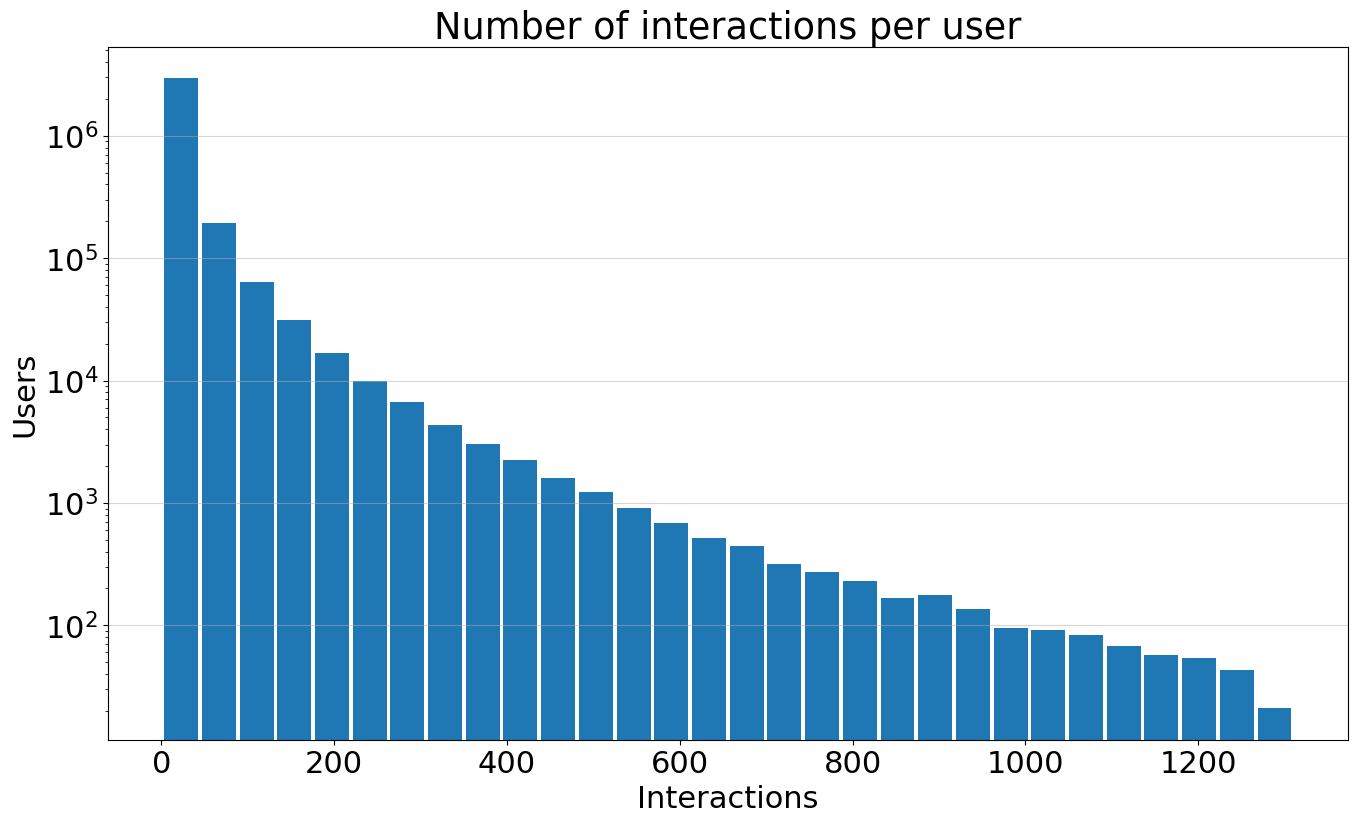

In [29]:
print("Interactions distribution per user:")
display(compute_quantiles(interactions_per_user))
plot_interactions_distribution(interactions_per_user, "user", "Users")

# Intercations distributions per item

Interactions distribution per item:


,quantile,value
0,0.01,1.00
1,0.10,1.00
2,0.25,3.00
3,0.50,137.00
4,0.75,428.00
5,0.90,950.00
6,0.99,2944.06


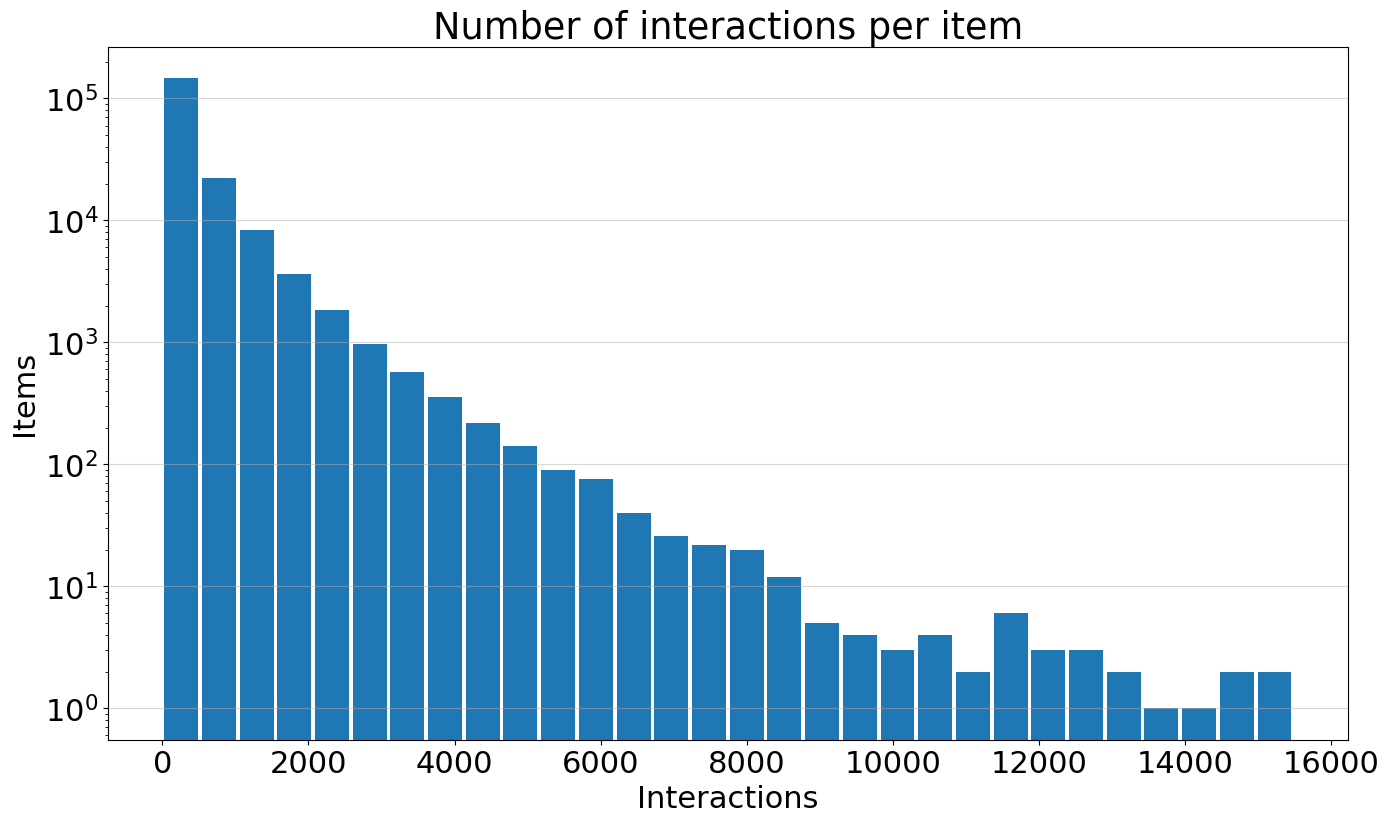

In [30]:
print("Interactions distribution per item:")
display(compute_quantiles(interactions_per_item))
plot_interactions_distribution(interactions_per_item, "item", "Items")

# events distribution

In [34]:
event_frequency = pd.DataFrame(
    interactions["event"].value_counts() / len(interactions)
).rename(columns={"event": "frequency"})

event_frequency["frequency"] = event_frequency["frequency"].apply(
    lambda x: f"{100*x:.2f}%"
)
event_frequency

,frequency
click,89.79%
contact_phone_click_1,2.63%
bookmark,2.51%
chat_click,2.14%
contact_chat,1.45%
contact_partner_click,0.70%
contact_phone_click_2,0.68%
contact_phone_click_3,0.10%


# Interactions over time

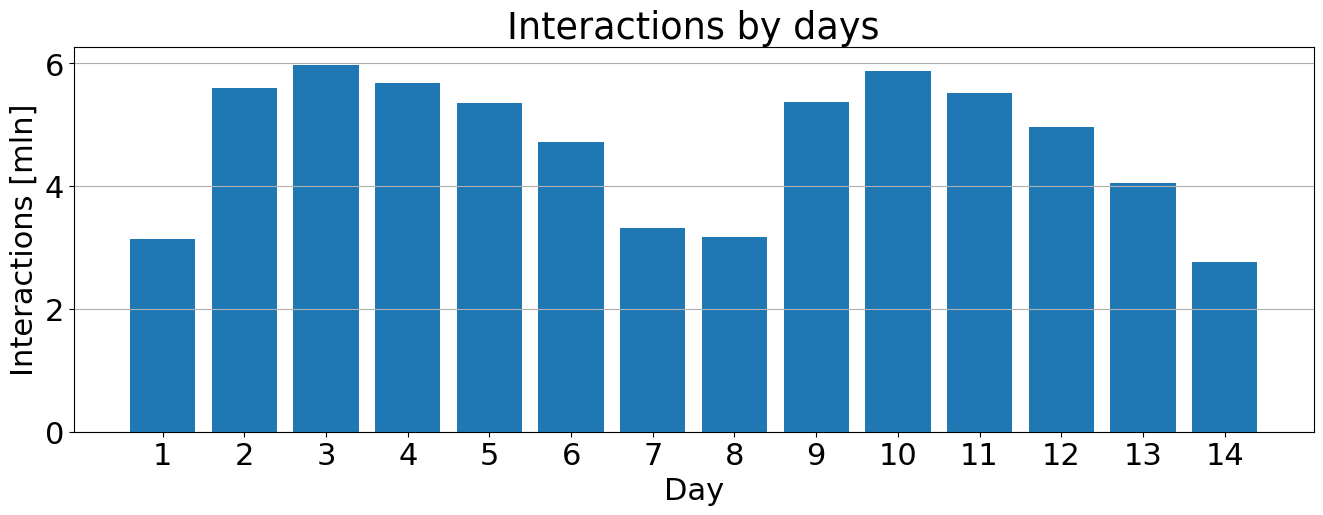

In [35]:
def unix_to_day(timestamps):
    min_timestamp = timestamps.min()
    seconds_in_day = 60*60*24
    return (timestamps - min_timestamp) // seconds_in_day + 1

def plot_interactions_over_time(series):
    freq = series.value_counts()
    labels, counts = freq.index, freq.values/10**6
    
    matplotlib.rcParams.update({"font.size": 22})
    plt.figure(figsize=(16,5))
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.title(f"Interactions by days")
    plt.xlabel("Day")
    plt.ylabel("Interactions [mln]")
    plt.grid(axis="y")

plot_interactions_over_time(unix_to_day(interactions["timestamp"]))